# CSIRO Suspended Sediment Trend

Maintainer: Xavier Ho <xavier.ho@csiro.au>

Using AGDC v2 API, we can extract a sample Landsat 5 slice. Suspended Sediment Trend is done by taking the average of two bands.

In [30]:
from pprint import pprint
from datetime import datetime
import xarray as xr

import matplotlib
import matplotlib.image
%matplotlib inline

from datacube.api import API, geo_xarray
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot

We first verify that `LEDAPS` is available in our database and load it.

INFO:datacube.analytics.analytics_engine:Initialise Analytics Module.
INFO:datacube.execution.execution_engine:Initialise Execution Module.


[u'LEDAPS', u'nbar', u'pqa']
plot3D


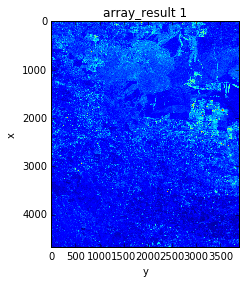

In [45]:
a = AnalyticsEngine()
e = ExecutionEngine()
dc = API()

print(dc.list_field_values('product'))

dimensions = {
    'x': {
        'range': (140, 141)
    },
    'y': {
        'range': (-35.5, -36.5)
    },
    'time': {
        'range': (datetime(2011, 10, 17), datetime(2011, 10, 18))
    }
}

green = a.create_array(('LANDSAT_5', 'LEDAPS'), ['band3'], dimensions, 'green')
blue = a.create_array(('LANDSAT_5', 'LEDAPS'), ['band2'], dimensions, 'blue')

approx = a.apply_expression([green, blue], '(array1 + array2) / 2', 'approx')

e.execute_plan(a.plan)
plot(e.cache['approx'])

We can save a slice of RGB bands into memory. Then we take a small slice and plot it.

> **note:** If the slice is too large, it may take a while.

We can take the green and blue bands, take the average, and save it to file. The image is saved at the same location as the notebook root folder.

`geo_xarray.reproject` reprojects northings and eastings to longitude and latitude units.

<xarray.DataArray (y: 2693, x: 4178)>
array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ..., 
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]])
Coordinates:
    time     datetime64[ns] 2011-10-17T00:15:48
  * y        (y) float64 -35.85 -35.85 -35.85 -35.85 -35.85 -35.85 -35.85 ...
  * x        (x) float64 140.0 140.0 140.0 140.0 140.0 140.0 140.0 140.0 ...


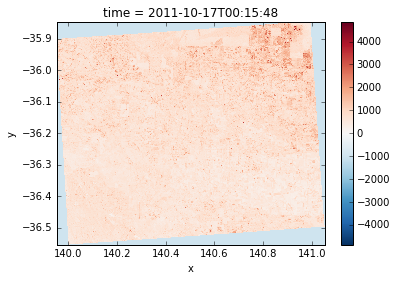

In [40]:
result = e.cache['approx']['array_result']['approx']
reprojected = datacube.api.geo_xarray.reproject(result.isel(time=0), 'EPSG:3577', 'WGS84')

pprint(reprojected)

reprojected.plot()

matplotlib.image.imsave('approx.png', reprojected)

The boundaries are as follows:

In [5]:
map(float, (reprojected.x[0], reprojected.x[-1], reprojected.y[0], reprojected.y[-1]))

[140.3187048680277, 140.90980383946007, -35.90085773120309, -36.38075732959616]